# ***Отчет для МинТранса***  

Я подготовлю отчет в виде последовательности из текста и ячеек кода; в ячейках текста будет описание и смысл каждого шага отчета, а в ячейке кода будут выполнены непосредственные действия, развивающие отчет и наглядная демонстрация полученной информации посредством графиков, кусков базы данных, статистических тестов и т. д.

**Начнём подготовку отчета с выгрузки базы данных**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('drive/MyDrive/flights.csv', low_memory=False) #flights dataset


**Проведем анализ задержек**

В нашей базе данных задержки зависят от нескольких факторов: задержка из-за воздушнаой системы, охранная, задержка со стороны авиакомпании, задержка из-за опаздания самолета, задержка ввиду погодных условий. Изучем более детально последние: рассмотрим число задержек в каждом месяце отдельно:

2     8940
6     7501
1     6383
5     6259
12    5913
8     5823
7     5601
4     4978
3     4510
11    3456
9     3246
10    2106
Name: MONTH, dtype: int64


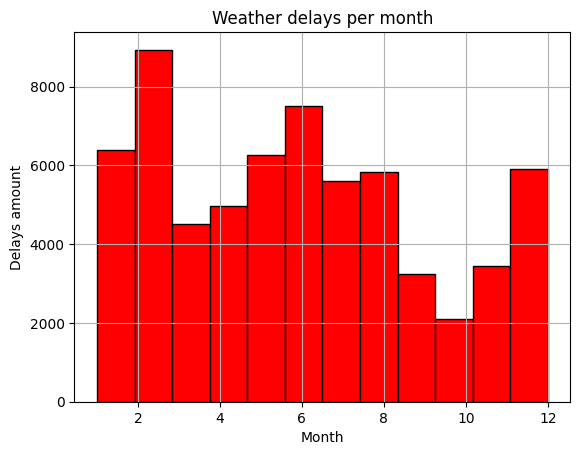

In [80]:
weather_delay = df[df['WEATHER_DELAY'] > 0]
print(weather_delay.MONTH.value_counts())

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

weather_delay.MONTH.hist(bins=12, range=(1, 12), color='r', edgecolor='k')
plt.title('Weather delays per month')
plt.xlabel('Month')
plt.ylabel('Delays amount')
plt.show()



Видим, что задержки происходят чаще всего в феврале, июне и январе, а реже всего в октябре, сентябре и ноябре. Я предположил, что это связано с общим количеством полётов в данные месяцы, что является следствием праздников и каникул. Решив проверить это, я увидел, что это не совсем так:

7     520718
8     510536
3     504312
6     503897
5     496993
10    486165
4     485151
12    479230
1     469968
11    467972
9     464946
2     429191
Name: MONTH, dtype: int64


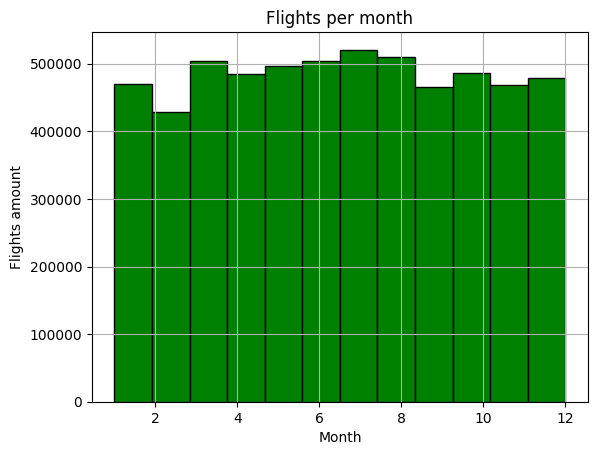

In [38]:
print(df.MONTH.value_counts())

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

df.MONTH.hist(bins=12, range=(1, 12), color='g', edgecolor='k')
plt.title('Flights per month')
plt.xlabel('Month')
plt.ylabel('Flights amount')
plt.show()

Видим, что в фервале было меньше всего полётов, но при этом задержек в феврале происходит больше всего. Прежде, чем сделать выводы о погодных задержках, проверим графики остальных задержек:

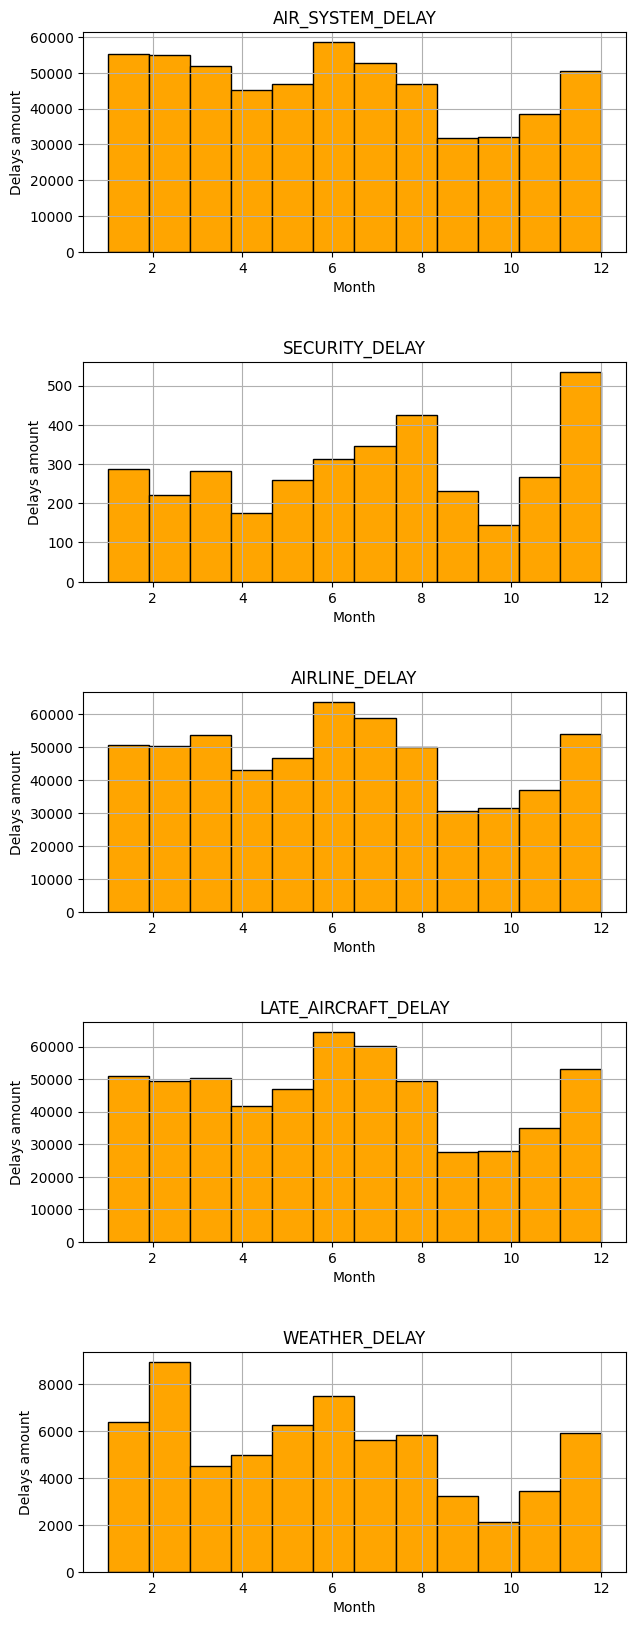

In [23]:
delay_type = ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']

fig = plt.figure(figsize=(7, 20))
fig.patch.set_facecolor('xkcd:white')

for k, i in enumerate(delay_type):
    plt.subplot(5, 1, k+1)
    delay = df[df[i] > 0]
    delay.MONTH.hist(bins=12, range=(1, 12), color='orange', edgecolor='k')
    plt.title(i)
    plt.xlabel('Month')
    plt.ylabel('Delays amount')

plt.subplots_adjust(hspace=0.5)
plt.show()




**Результат 1)** Напрашивается вывод, о том, что количество задержек из-за погоды в феврале не зависит от работы аэропорта, а только от естественных природных процессов. В феврале из-за сезонных муссонов бывает очень сильный ветер, поэтому так много задержек, произошедших по причине пагубных погодных условий.

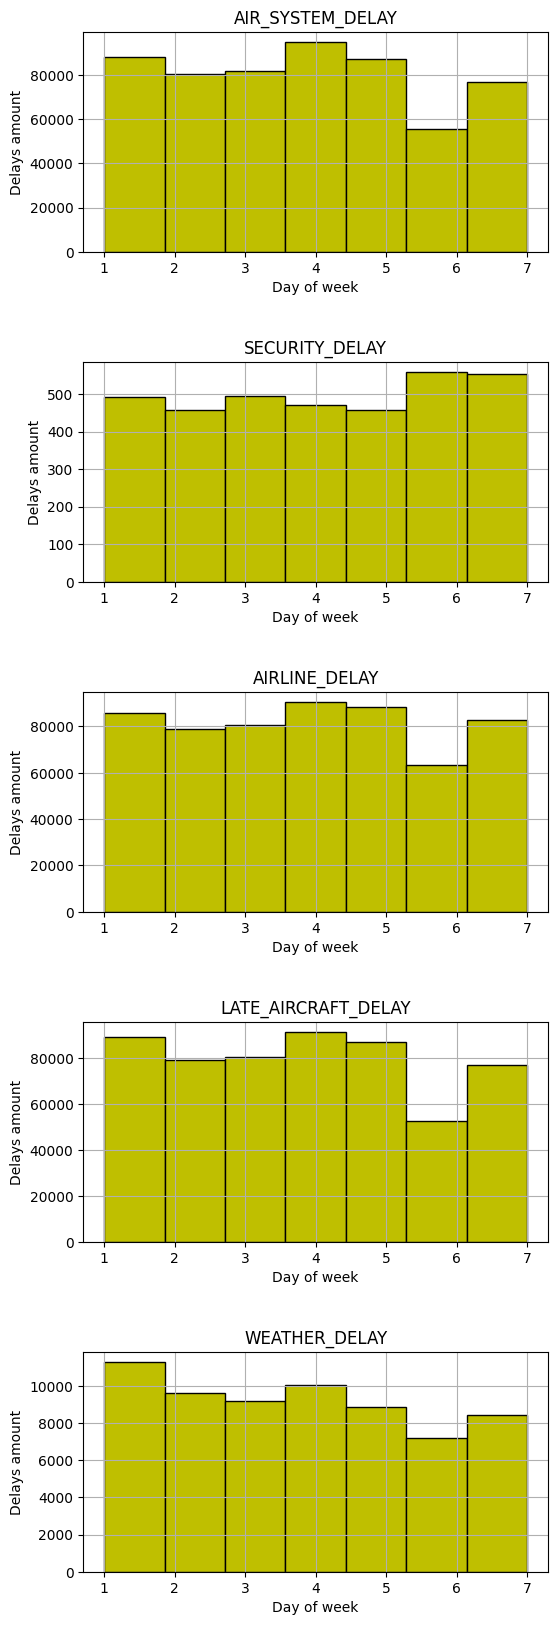

In [28]:
'''security_delay = df[df['SECURITY_DELAY'] > 0]
print(security_delay.DAY_OF_WEEK.value_counts())

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

security_delay.DAY_OF_WEEK.hist(bins=7, range=(1, 7), color='b', edgecolor='k')
plt.title('Security delays per month')
plt.xlabel('Month')
plt.ylabel('Delays amount')
plt.show()'''
fig = plt.figure(figsize=(6, 20))
fig.patch.set_facecolor('xkcd:white')

for k, i in enumerate(delay_type):
    plt.subplot(5, 1, k+1)
    delay = df[df[i] > 0]
    delay.DAY_OF_WEEK.hist(bins=7, range=(1, 7), color='y', edgecolor='k')
    plt.title(i)
    plt.xlabel('Day of week')
    plt.ylabel('Delays amount')

plt.subplots_adjust(hspace=0.5)
plt.show()


Видно, что задержки по причине охраны на выходных больше, чем в другие дни. Опять же посмотрим на общее количество рейсов по дням недели и еще посчитаем корреляцию задержек и количества полётов:


4    872521
1    865543
5    862209
3    855897
2    844600
7    817764
6    700545
Name: DAY_OF_WEEK, dtype: int64


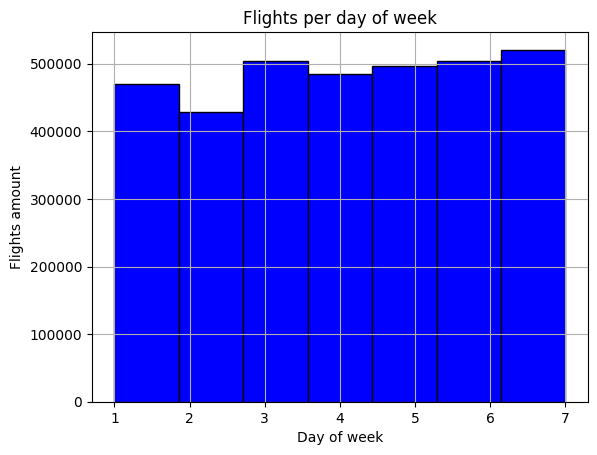

array([[1.        , 0.63626761],
       [0.63626761, 1.        ]])

In [39]:
print(df.DAY_OF_WEEK.value_counts())

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

df.MONTH.hist(bins=7, range=(1, 7), color='b', edgecolor='k')
plt.title('Flights per day of week')
plt.xlabel('Day of week')
plt.ylabel('Flights amount')
plt.show()

security_delay = df[df['SECURITY_DELAY'] > 0]
np.corrcoef(np.array(df.DAY_OF_WEEK.value_counts()), np.array(security_delay.DAY_OF_WEEK.value_counts()))

**Результат 2)** Если сравнить с графиком задержек по причине охраны от дня недели явно увеличивается с количеством вылетов, об этом говорит и их положительный коэффециент корреляции. Поэтому можно сделать вывод, что по выходным и средам охрана создаёт задержки вылетов, т. е. не справляется с неравномерной нагрузкой на неделе.


In [48]:
airline_delay = df[df['AIRLINE_DELAY'] > 0]
print(airline_delay.AIRLINE.value_counts())



WN    144524
AA     68656
UA     65999
DL     63128
EV     53943
OO     39127
B6     38665
MQ     27236
US     19717
NK     17307
F9     11517
AS      8363
HA      7395
VX      4445
Name: AIRLINE, dtype: int64


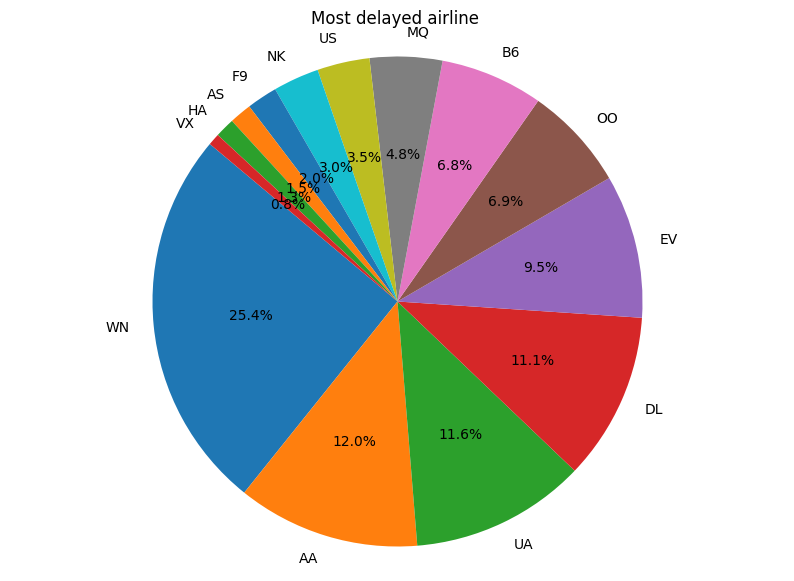

In [50]:
labels = ['WN', 'AA', 'UA', 'DL', 'EV', 'OO', 'B6', 'MQ', 'US', 'NK', 'F9', 'AS', 'HA', 'VX']
sizes = [144524, 68656, 65999, 63128, 53943, 39127, 38665, 27236, 19717, 17307, 11517, 8363, 7395, 4445]

plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')

plt.title('Most delayed airline ')

plt.show()


In [55]:
june_flights = df[df['MONTH'] == 6]
print(june_flights.AIRLINE.value_counts()/sum(june_flights.AIRLINE.value_counts()))

[]
WN    0.217854
DL    0.153315
OO    0.099836
EV    0.097478
UA    0.091455
AA    0.088034
US    0.068069
MQ    0.050421
B6    0.044767
AS    0.029917
NK    0.019500
F9    0.015664
HA    0.013251
VX    0.010439
Name: AIRLINE, dtype: float64


**Результат 3)** Из последней круговой диаграммы и списка долей полётов каждой из авиакомпаний от общего числа полётов за июль, месяц в котором происходит пик задержек из-за авиакомпаний, получаем что авиакомпания WN создаёт больше всего задержек.

In [64]:
late_aircraft_delay = df[df['LATE_AIRCRAFT_DELAY'] > 0]
airline_delay = df[df['AIRLINE_DELAY'] > 0]
airsystem_delay = df[df['AIR_SYSTEM_DELAY'] > 0]
print(np.corrcoef(np.array(late_aircraft_delay.DAY_OF_WEEK.value_counts()), np.array(airsystem_delay.DAY_OF_WEEK.value_counts())))
print(np.corrcoef(np.array(late_aircraft_delay.DAY_OF_WEEK.value_counts()), np.array(airline_delay.DAY_OF_WEEK.value_counts())))
print(np.corrcoef(np.array(airline_delay.DAY_OF_WEEK.value_counts()), np.array(airsystem_delay.DAY_OF_WEEK.value_counts())))

[[1.         0.99251248]
 [0.99251248 1.        ]]
[[1.         0.99734813]
 [0.99734813 1.        ]]
[[1.         0.99570908]
 [0.99570908 1.        ]]


**Результат 4)** Количество задержек по типам авиакомпания, неисправность и опаздания самолёта коррелируют практически с коэфициентом 1, а значит решив проблему с учащением задержк от авиакомпаний, решатся и проблемы задержек по причине опазадний и аэро-систем.

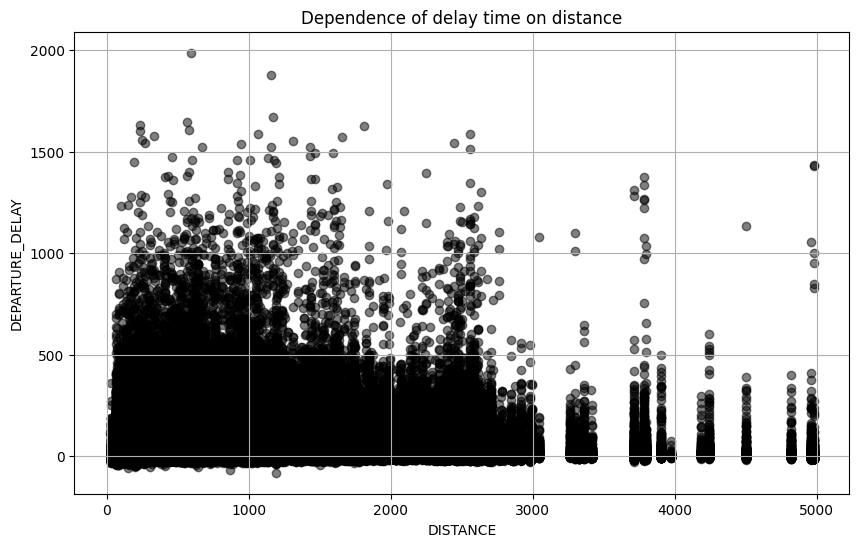

In [79]:
distance_df = df.loc[:, ['DEPARTURE_DELAY', 'DISTANCE']]
distance_df =distance_df.dropna()

plt.figure(figsize=(10, 6))
plt.scatter(distance_df['DISTANCE'], distance_df['DEPARTURE_DELAY'], alpha=0.5, color='k')
plt.title('Dependence of delay time on distance')
plt.xlabel('DISTANCE')
plt.ylabel('DEPARTURE_DELAY')
plt.grid(True)

plt.show()


**Результат 5)** Мы видим, что задержки чаще всего происходят, когда самолёт пролетает дистанции от 0 до примерно 1200 км, а значит, что полёты на дальнии дистанции проходят более 'гладко', возмонжо потому, что к таким рейсам персонал подходит более ответственно.

# Общий вывод

Задержек не всегда можно избежать: на погодные условия повлияеть нельзя. Однако на рост задержек в популярные месяцы и дни недели можно повлиять, повышая подготовку и численность персонала аэропорта. В большинстве случаев в задержке виновата авиакомпания, самолёты которой еще и опаздывают или ломаются (я так понял причину AIR_SYSTEM), поэтому администрация аэропорта должна призвать такие компании к большей дисциплине.